<a href="https://colab.research.google.com/github/wetwetwet/Projects/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### ==================== Final Assignment ======================= ### 
# Name: Huang Shih-Ting(Melody)
# Matric No.: G2100429J
import pandas as pd
import keras
import numpy as np
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv("/content/drive/MyDrive/AN6001/Credit Card Default.csv")

In [ ]:
print(bank)

      clientid       income        age         loan  default
0            1  66155.92510  59.017015  8106.532131        0
1            2  34415.15397  48.117153  6564.745018        0
2            3  57317.17006  63.108049  8020.953296        0
3            4  42709.53420  45.751972  6103.642260        0
4            5  66952.68885  18.584336  8770.099235        1
...        ...          ...        ...          ...      ...
1995      1996  59221.04487  48.518179  1926.729397        0
1996      1997  69516.12757  23.162104  3503.176156        0
1997      1998  44311.44926  28.017167  5522.786693        1
1998      1999  43756.05660  63.971796  1622.722598        0
1999      2000  69436.57955  56.152617  7378.833599        0

[2000 rows x 5 columns]


# **Data Wrangling**

In [ ]:
bank.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459720,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117310,41.317159,3974.719418,0.000000
75%,1500.250000,57791.281670,52.587040,6432.410625,0.000000
max,2000.000000,69995.685580,63.971796,13766.051240,1.000000


In [ ]:
# Remove people who's age is smaller than 18, since people who's under the age limit(i.e. 18) cannot have jobs and income.
bank_clean = bank[bank.loc[:,"age"]>=18]
print(bank_clean.age.describe())
print(bank_clean.describe())

count    1994.000000
mean       40.927700
std        13.271802
min        18.055189
25%        29.043284
50%        41.382673
75%        52.616900
max        63.971796
Name: age, dtype: float64
          clientid        income          age          loan      default
count  1994.000000   1994.000000  1994.000000   1994.000000  1994.000000
mean   1003.431795  45328.856915    40.927700   4443.240892     0.141926
std     575.879624  14326.777212    13.271802   3046.879619     0.349062
min       1.000000  20014.489470    18.055189      1.377630     0.000000
25%     505.250000  32812.340053    29.043284   1934.218490     0.000000
50%    1003.500000  45785.950925    41.382673   3971.653442     0.000000
75%    1501.750000  57782.054535    52.616900   6438.044498     0.000000
max    2000.000000  69995.685580    63.971796  13766.051240     1.000000


In [ ]:
# Remove meaningless columns(i.e. the Client ID)
bank_clean = bank_clean.iloc[:,1:5]
print(bank_clean)

           income        age         loan  default
0     66155.92510  59.017015  8106.532131        0
1     34415.15397  48.117153  6564.745018        0
2     57317.17006  63.108049  8020.953296        0
3     42709.53420  45.751972  6103.642260        0
4     66952.68885  18.584336  8770.099235        1
...           ...        ...          ...      ...
1995  59221.04487  48.518179  1926.729397        0
1996  69516.12757  23.162104  3503.176156        0
1997  44311.44926  28.017167  5522.786693        1
1998  43756.05660  63.971796  1622.722598        0
1999  69436.57955  56.152617  7378.833599        0

[1994 rows x 4 columns]


In [ ]:
# Drop NAs
bank_clean = bank_clean.dropna()

In [ ]:
bank_clean.isna().any()

income     False
age        False
loan       False
default    False
dtype: bool

In [ ]:
# Drop NaN
bank_clean.isnull().values.any()

False

In [ ]:
bank_clean.describe()

,income,age,loan,default
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,45328.856915,40.927700,4443.240892,0.141926
std,14326.777212,13.271802,3046.879619,0.349062
min,20014.489470,18.055189,1.377630,0.000000
25%,32812.340053,29.043284,1934.218490,0.000000
50%,45785.950925,41.382673,3971.653442,0.000000
75%,57782.054535,52.616900,6438.044498,0.000000
max,69995.685580,63.971796,13766.051240,1.000000


In [ ]:
# Normalization

In [ ]:
bank_clean["income"]=stats.zscore(bank_clean["income"].astype(np.float))
print(bank_clean)

        income        age         loan  default
0     1.454081  59.017015  8106.532131        0
1    -0.761961  48.117153  6564.745018        0
2     0.836987  63.108049  8020.953296        0
3    -0.182873  45.751972  6103.642260        0
4     1.509708  18.584336  8770.099235        1
...        ...        ...          ...      ...
1995  0.969909  48.518179  1926.729397        0
1996  1.688680  23.162104  3503.176156        0
1997 -0.071032  28.017167  5522.786693        1
1998 -0.109808  63.971796  1622.722598        0
1999  1.683126  56.152617  7378.833599        0

[1994 rows x 4 columns]


In [ ]:
bank_clean["loan"]=stats.zscore(bank_clean["loan"].astype(np.float))
print(bank_clean)

        income        age      loan  default
0     1.454081  59.017015  1.202611        0
1    -0.761961  48.117153  0.696462        0
2     0.836987  63.108049  1.174516        0
3    -0.182873  45.751972  0.545088        0
4     1.509708  18.584336  1.420451        1
...        ...        ...       ...      ...
1995  0.969909  48.518179 -0.826138        0
1996  1.688680  23.162104 -0.308611        0
1997 -0.071032  28.017167  0.354401        1
1998 -0.109808  63.971796 -0.925939        0
1999  1.683126  56.152617  0.963717        0

[1994 rows x 4 columns]


In [ ]:
# Remove Outlier

In [ ]:
z = stats.zscore(bank_clean.astype(np.float))
print(z)
abs_z = np.abs(z)
filtered = (abs_z < 3).all(axis=1)
bank_clean = bank_clean[filtered]

print(bank_clean)  # Remain (1993, 4)

[[ 1.45408086  1.36333045  1.20261074 -0.40669442]
 [-0.76196066  0.54184472  0.69646214 -0.40669442]
 [ 0.83698659  1.67165787  1.17451633 -0.40669442]
 ...
 [-0.07103223 -0.97302324  0.35440081  2.45884859]
 [-0.10980801  1.73675551 -0.92593938 -0.40669442]
 [ 1.68312591  1.14745046  0.9637168  -0.40669442]]
        income        age      loan  default
0     1.454081  59.017015  1.202611        0
1    -0.761961  48.117153  0.696462        0
2     0.836987  63.108049  1.174516        0
3    -0.182873  45.751972  0.545088        0
4     1.509708  18.584336  1.420451        1
...        ...        ...       ...      ...
1995  0.969909  48.518179 -0.826138        0
1996  1.688680  23.162104 -0.308611        0
1997 -0.071032  28.017167  0.354401        1
1998 -0.109808  63.971796 -0.925939        0
1999  1.683126  56.152617  0.963717        0

[1993 rows x 4 columns]


In [ ]:
bank_clean.describe()
# No categorical variables, so need not convert to dummy variables

,income,age,loan,default
count,1993.000000,1993.000000,1993.000000,1993.000000
mean,-0.000856,40.925886,-0.001536,0.141997
std,0.999772,13.274886,0.998148,0.349135
min,-1.767370,18.055189,-1.458206,0.000000
25%,-0.874383,29.033679,-0.823963,0.000000
50%,0.031718,41.353171,-0.154979,0.000000
75%,0.868289,52.626853,0.652094,0.000000
max,1.722161,63.971796,2.954659,1.000000


# **Check Correlation**

In [ ]:
bank_clean.corr()

,income,age,loan,default
income,1.000000,-0.033514,0.439811,0.002716
age,-0.033514,1.000000,0.006282,-0.445219
loan,0.439811,0.006282,1.000000,0.379322
default,0.002716,-0.445219,0.379322,1.000000


In [ ]:
# pip install seaborn

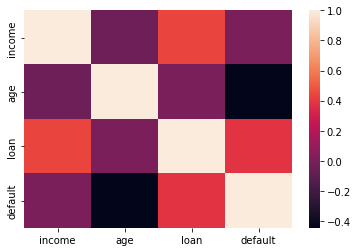

In [ ]:
import seaborn as sns
sns.heatmap(bank_clean.corr())

In [ ]:
X = bank_clean.iloc[:, 0:3]
Y = bank_clean.iloc[:, 3]
print(X,Y)

        income        age      loan
0     1.454081  59.017015  1.202611
1    -0.761961  48.117153  0.696462
2     0.836987  63.108049  1.174516
3    -0.182873  45.751972  0.545088
4     1.509708  18.584336  1.420451
...        ...        ...       ...
1995  0.969909  48.518179 -0.826138
1996  1.688680  23.162104 -0.308611
1997 -0.071032  28.017167  0.354401
1998 -0.109808  63.971796 -0.925939
1999  1.683126  56.152617  0.963717

[1993 rows x 3 columns] 0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 1993, dtype: int64


# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into 70% train set and 30% test set
np.random.seed(6001)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
print(X_train, X_test, Y_train, Y_test)

        income        age      loan
155   0.444084  46.154192  1.785466
798  -0.097160  56.409682 -0.403694
676  -0.250828  34.596492  1.037181
1000  0.381514  41.601886 -1.320239
1757  1.375536  36.700691 -0.725929
...        ...        ...       ...
1672  1.447000  39.077139  1.929624
1652 -1.497367  32.893710 -1.067790
293  -0.954483  37.778664 -0.983275
1434  1.305624  36.157751 -0.918843
498   0.264322  61.481523  0.638718

[1395 rows x 3 columns]         income        age      loan
616   0.283897  41.084909  0.487287
1904  0.188660  43.670164  1.110623
1540 -0.401832  29.137026  0.440772
495   0.175845  26.651838  1.329817
365  -0.915023  61.810616 -1.151881
...        ...        ...       ...
328  -0.634385  39.415471  0.408965
1400 -0.077259  55.861472  0.984942
1358  0.215991  41.854248 -0.302902
188   0.910105  55.596549  0.448656
1552  0.762902  22.160503  0.331243

[598 rows x 3 columns] 155     0
798     0
676     1
1000    0
1757    0
       ..
1672    0
1652    0
293    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


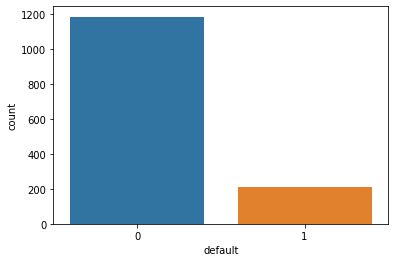

In [ ]:
# Check whether the dependent variable of train dataset is balanced or not
sns.countplot(Y_train)
# Imbalanced, needs resampling

In [ ]:
Y1_num = Y_train[Y_train.iloc[:]==1].count()
Y0_num = Y_train[Y_train.iloc[:]==0].count()
print(round(Y1_num/(Y0_num+Y1_num),4))
print(round(Y0_num/(Y0_num+Y1_num),4))
# The original proportion of default rate in the train dataset is 15.05%
# The Non-default rate in the train dataset is 84.95%
# The train set data requires resampling

0.1505
0.8495


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


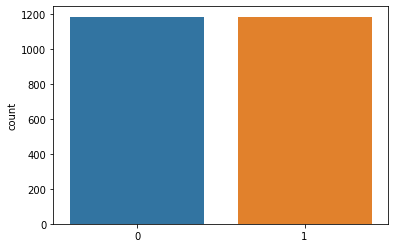

In [ ]:
## Oversampling
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(random_state=6001)
os.fit(X_train, Y_train)
X_resampled, Y_resampled = os.fit_resample(X_train, Y_train)
sns.countplot(Y_resampled)
# Now the train dataset is balanced

In [ ]:
X_resampled = pd.DataFrame(X_resampled)
Y_resampled = pd.DataFrame(Y_resampled)

In [ ]:
XY_resampled = pd.concat([X_resampled,Y_resampled], axis=1)

# **Modelling**

# **NN**

I used 5-fold cross validation to adjust the hyperparameters in neural network model, which are "optimizer" and "loss function".
Based on the validation result, among the two loss functions: hinge and binary_crossentropy, and the four optimizers: Adam, Adamax, SGD, Nadam, the set of ("binary_crossentropy", "Nadam") has the highest mean accuracy. Thus, I set them as the optimal NN model and fit in the test data.

The confusion matrix and the performance report showed that test set accuracy was 90%. Since in credit default scenario, we consider more on whether we missed to predict people who default in reality, we fucos more on recall rate.
The test set performance report showed the recall rate of NN model was 99%, which means that we did not miss to predict people who actually default.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold

np.random.seed(6001)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 5-fold Cross Validation
kf = KFold(n_splits=5, random_state=6001, shuffle=True)

KFold(n_splits=5, random_state=6001, shuffle=True)

--------------------------------------------------
Training for fold 1 ...
Epoch 1/30
60/60 [==============================] - 2s 5ms/step - loss: 1.0005 - accuracy: 0.5137 - val_loss: 0.6801 - val_accuracy: 0.5190
Epoch 2/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7796 - accuracy: 0.4937 - val_loss: 0.6817 - val_accuracy: 0.5190
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7386 - accuracy: 0.4889 - val_loss: 0.6754 - val_accuracy: 0.5190
Epoch 4/30
60/60 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5084 - val_loss: 0.6718 - val_accuracy: 0.5274
Epoch 5/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5090 - val_loss: 0.6690 - val_accuracy: 0.5422
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5084 - val_loss: 0.6670 - val_accuracy: 0.5970
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6903 - accu

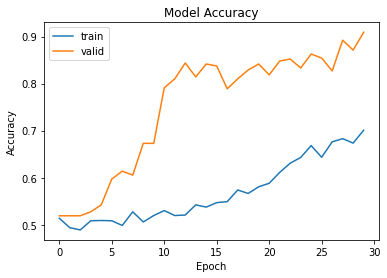

--------------------------------------------------
Training for fold 2 ...
Epoch 1/30
60/60 [==============================] - 1s 5ms/step - loss: 1.3207 - accuracy: 0.4963 - val_loss: 0.6546 - val_accuracy: 0.5105
Epoch 2/30
60/60 [==============================] - 0s 3ms/step - loss: 0.8357 - accuracy: 0.4958 - val_loss: 0.6822 - val_accuracy: 0.4620
Epoch 3/30
60/60 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.5258 - val_loss: 0.6799 - val_accuracy: 0.7932
Epoch 4/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5311 - val_loss: 0.6739 - val_accuracy: 0.8819
Epoch 5/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5327 - val_loss: 0.6672 - val_accuracy: 0.8059
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5190 - val_loss: 0.6674 - val_accuracy: 0.8840
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6881 - accu

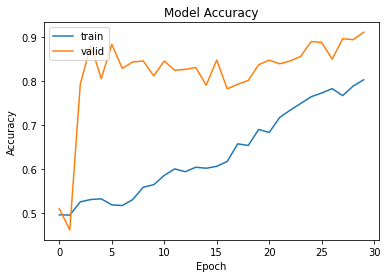

--------------------------------------------------
Training for fold 3 ...
Epoch 1/30
60/60 [==============================] - 1s 5ms/step - loss: 1.0693 - accuracy: 0.5174 - val_loss: 0.6670 - val_accuracy: 0.4916
Epoch 2/30
60/60 [==============================] - 0s 3ms/step - loss: 0.8272 - accuracy: 0.5195 - val_loss: 0.6674 - val_accuracy: 0.4916
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.5206 - val_loss: 0.6692 - val_accuracy: 0.4852
Epoch 4/30
60/60 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.5116 - val_loss: 0.6713 - val_accuracy: 0.5928
Epoch 5/30
60/60 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5274 - val_loss: 0.6706 - val_accuracy: 0.7046
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5258 - val_loss: 0.6712 - val_accuracy: 0.7532
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.6889 - accu

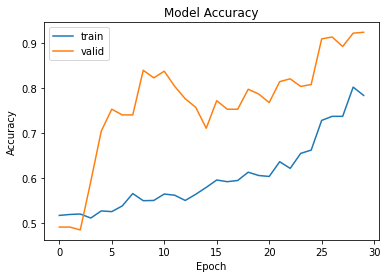

--------------------------------------------------
Training for fold 4 ...
Epoch 1/30
60/60 [==============================] - 1s 5ms/step - loss: 5.2378 - accuracy: 0.5042 - val_loss: 3.3651 - val_accuracy: 0.4979
Epoch 2/30
60/60 [==============================] - 0s 2ms/step - loss: 2.3822 - accuracy: 0.4884 - val_loss: 1.1347 - val_accuracy: 0.4979
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 1.2858 - accuracy: 0.4826 - val_loss: 0.7645 - val_accuracy: 0.4093
Epoch 4/30
60/60 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.4573 - val_loss: 0.7128 - val_accuracy: 0.4620
Epoch 5/30
60/60 [==============================] - 0s 2ms/step - loss: 0.8723 - accuracy: 0.4763 - val_loss: 0.6963 - val_accuracy: 0.5021
Epoch 6/30
60/60 [==============================] - 0s 3ms/step - loss: 0.8165 - accuracy: 0.4884 - val_loss: 0.6966 - val_accuracy: 0.5021
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.8215 - accu

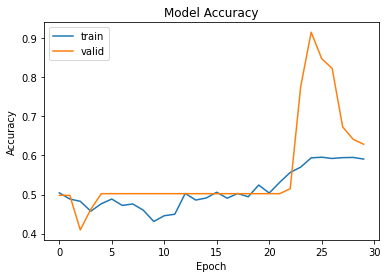

--------------------------------------------------
Training for fold 5 ...
Epoch 1/30
60/60 [==============================] - 2s 10ms/step - loss: 5.1618 - accuracy: 0.5090 - val_loss: 0.7150 - val_accuracy: 0.5549
Epoch 2/30
60/60 [==============================] - 0s 2ms/step - loss: 2.5330 - accuracy: 0.5005 - val_loss: 0.6257 - val_accuracy: 0.5591
Epoch 3/30
60/60 [==============================] - 0s 2ms/step - loss: 1.8449 - accuracy: 0.4921 - val_loss: 0.5987 - val_accuracy: 0.6624
Epoch 4/30
60/60 [==============================] - 0s 3ms/step - loss: 1.3274 - accuracy: 0.5280 - val_loss: 0.6115 - val_accuracy: 0.5211
Epoch 5/30
60/60 [==============================] - 0s 3ms/step - loss: 1.0798 - accuracy: 0.5153 - val_loss: 0.6131 - val_accuracy: 0.4768
Epoch 6/30
60/60 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5401 - val_loss: 0.6203 - val_accuracy: 0.4979
Epoch 7/30
60/60 [==============================] - 0s 2ms/step - loss: 0.8319 - acc

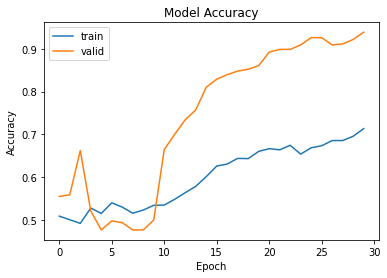

In [ ]:
fold_no = 1
loss_per_fold =[]
acc_per_fold = []
np.random.seed(6001)

for trainIndex, validIndex in kf.split(XY_resampled):
  # Define the model 
  model_NN = Sequential()

  model_NN.add(Dense(10, input_dim=3, activation = "relu"))
  model_NN.add(Dropout(0.2))

  model_NN.add(Dense(8, activation = "relu"))
  model_NN.add(Dropout(0.3))

  model_NN.add(Dense(6, activation = "relu"))
  model_NN.add(Dropout(0.3))

  model_NN.add(Dense(1, activation = "sigmoid"))

  model_NN.compile(loss = 'binary_crossentropy', optimizer = "Nadam", metrics = ["accuracy"]) 
  # After using 5-fold cross validation, I compared two different loss function(hinge, binary_crossentropy) and 
  # four different optimizers (Adam, Adamax, SGD, Nadam) and found the highest mean accuracy- "Nadam" and "binary_crossentropy"

  print('-'*50)
  print(f'Training for fold {fold_no} ...')

  # Fit training data and validation data to model
  history = model_NN.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3],
              batch_size=32, epochs=30, verbose=1,
              validation_data=(XY_resampled.iloc[validIndex, 0:3], XY_resampled.iloc[validIndex,3]))

  # Evaluate the model (Loss & Accuracy) by validation data
  scores = model_NN.evaluate(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex, 3], verbose=1)
  print(f'Score for fold {fold_no}: {model_NN.metrics_names[0]} of {scores[0]}; {model_NN.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # plot the Accuracy of training and validation in each epoch
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  fold_no = fold_no + 1

In [ ]:
# Validation accuracy per fold
print(acc_per_fold)
print(np.mean(acc_per_fold))

[90.92826843261719, 91.13923907279968, 92.40506291389465, 62.86919713020325, 93.88185739517212]
86.24472498893738


In [ ]:
# Validation loss per fold
print(loss_per_fold)
print(np.mean(loss_per_fold))

[0.5026978850364685, 0.3722006380558014, 0.3918863832950592, 0.6748626828193665, 0.3949972093105316]
0.46732895970344546


In [ ]:
## Test Data
pred_NN = model_NN.predict(X_test)
pred_NN = np.where(pred_NN > 0.5,1,0)
cm_NN = confusion_matrix(Y_test, pred_NN)
print(cm_NN)

[[466  59]
 [  1  72]]


In [ ]:
# Prediction report for Test Dataset(precision, recall rate, F1, accuracy)
print(classification_report(Y_test, pred_NN)) 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       525
           1       0.55      0.99      0.71        73

    accuracy                           0.90       598
   macro avg       0.77      0.94      0.82       598
weighted avg       0.94      0.90      0.91       598



# **Logistic Regression**

In logistic regression, I used 5-fold cross validation to adjust the hyperparameter "solver". Among the three solver, which were lbfgs, liblinear, and newton-cg, "liblinear" had the highest mean accuracy. Thus, I set it as the optimal logistic regression model. After fitting in the test dataset, the accuracy and recall rate were 91% and 93%, respectively.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [ ]:
# 5-fold Cross Validation
kf = KFold(n_splits=5, random_state=6001, shuffle=True)

fold_no = 1
np.random.seed(6001)

for trainIndex, validIndex in kf.split(XY_resampled):
  # Define the model 
  model_LR = linear_model.LogisticRegression(solver='liblinear')

  print('-'*50)
  print(f'Training for fold {fold_no} ...')

  # Fit training data to model
  history = model_LR.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3])

  # Evaluate the model (Loss & Accuracy)
  scores = model_LR.score(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex, 3])
  score = round(scores*100,2)
  print(f'Accuracy:  {score} %')

  fold_no = fold_no + 1

--------------------------------------------------
Training for fold 1 ...
Accuracy:  94.73 %
--------------------------------------------------
Training for fold 2 ...
Accuracy:  94.3 %
--------------------------------------------------
Training for fold 3 ...
Accuracy:  92.19 %
--------------------------------------------------
Training for fold 4 ...
Accuracy:  94.51 %
--------------------------------------------------
Training for fold 5 ...
Accuracy:  95.15 %


In [ ]:
## Test Data
pred_LR = model_LR.predict(X_test)
cm_LR = confusion_matrix(Y_test, pred_LR)
print(cm_LR)

[[478  47]
 [  5  68]]


In [ ]:
# Prediction report for Test Dataset(precision, recall rate, F1, accuracy)
print(classification_report(Y_test, pred_LR)) 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       525
           1       0.59      0.93      0.72        73

    accuracy                           0.91       598
   macro avg       0.79      0.92      0.84       598
weighted avg       0.94      0.91      0.92       598



# **Random Forest**

In random forest model, I used 10-fold cross validation to adjust the hyperparameter "Max_depth". From the result, I found that the accuracy decreased from the 2rd fold (94.09%) to the 3th fold (93.67%). Thus, I set the optimal random forest's Max_depth to "2". Based on the testing data result, the accuracy and recall rate were 91% and 97% respectively. Moreover, from the feature importance, we can conclude that "Age" is the most important variable in predicting credit card default.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 10-fold Cross Validation
kf = KFold(n_splits=10, random_state=6001, shuffle=True)

In [ ]:
fold_no = 1
loss_per_fold =[]
acc_per_fold = []
maxDepth = 1  # use 5-fold CV to adjust max_depth
np.random.seed(6001)

for trainIndex, validIndex in kf.split(XY_resampled):
  # Define the model 
  model_RF = RandomForestClassifier(max_depth=maxDepth)

  print('-'*50)
  print(f'Training for fold {fold_no} ...')

  # Fit training data to model
  history = model_RF.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3])

  # Evaluate the model (Loss & Accuracy)
  scores = model_RF.score(XY_resampled.iloc[validIndex,0:3], XY_resampled.iloc[validIndex, 3])
  score = round(scores*100,2)
  print(f'Accuracy:  {score} %')

  fold_no = fold_no + 1
  maxDepth = maxDepth + 1
  
  # From the 10-fold Cross Validation, we found that the accuracy decreased from the 2rd fold (94.09%) to the 3th fold (93.67%) 
  # Thus we set the optimal random forest's Max_depth to "2"

--------------------------------------------------
Training for fold 1 ...
Accuracy:  89.03 %
--------------------------------------------------
Training for fold 2 ...
Accuracy:  94.09 %
--------------------------------------------------
Training for fold 3 ...
Accuracy:  93.67 %
--------------------------------------------------
Training for fold 4 ...
Accuracy:  97.47 %
--------------------------------------------------
Training for fold 5 ...
Accuracy:  99.16 %
--------------------------------------------------
Training for fold 6 ...
Accuracy:  98.73 %
--------------------------------------------------
Training for fold 7 ...
Accuracy:  99.16 %
--------------------------------------------------
Training for fold 8 ...
Accuracy:  97.89 %
--------------------------------------------------
Training for fold 9 ...
Accuracy:  99.16 %
--------------------------------------------------
Training for fold 10 ...
Accuracy:  99.16 %


In [ ]:
# The optimal Random Forest
model_RF_best = RandomForestClassifier(max_depth=2)
model_RF_best.fit(XY_resampled.iloc[trainIndex,0:3], XY_resampled.iloc[trainIndex,3])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
## Test Data
pred_RF = model_RF_best.predict(X_test)
cm_RF = confusion_matrix(Y_test, pred_RF)
print(cm_RF)

[[471  54]
 [  2  71]]


In [ ]:
# Prediction report for Test Dataset(precision, recall rate, F1, accuracy)
print(classification_report(Y_test, pred_RF)) 

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       525
           1       0.57      0.97      0.72        73

    accuracy                           0.91       598
   macro avg       0.78      0.93      0.83       598
weighted avg       0.94      0.91      0.92       598



Feature: 0, Score: 0.06382
Feature: 1, Score: 0.54591
Feature: 2, Score: 0.39026


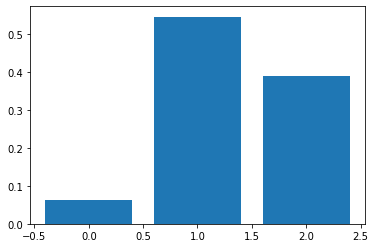

In [ ]:
# Get importance variables
importance = model_RF_best.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Age is the most important variable, loan is the second important one.